# Linear Regression

It tries to predict the best fitted line for the given data points by finding the relationship between the dependent and one or more independent variables.
There are two types of linear regression:
* Univariate Linear Regression (Single independent variable)
* Multivariate Linear Regression (Multiple independent variables)

There are two ways to solve the linear regression problem:
* Normal Equation/Closed-form Solution (Ordinary Least Squares)
* Gradient Descent (Iterative approach)

### Assumptions for Linear Regression
* Linearity
    * There is a linear relationship between input and the output variables
* Homoscedasticity
    * The variance of residuals should be constant across all level of input
* Normality of residuals
    * There should be normalization in the residuals
* Independence of errors
    * The error should be independent from the other errors
* Lack of multicollinearity
    * There should be no collinearity between the input data; features.


Now we will check the assumption about our data is our data in perfect shape or not. We will check the assumptions.


### Closed form solution

We try to find the possible solution throught the finite number of mathematical equations. By closed form we find the exact values of the coefficients. The draw back is it complexity so we don't recommend it for the large dataset usually the observations greater than 1000, also if the X transpose X is not invertible then we prefer to use the iterative approach which is gradient descent.
Note: The solution we are trying to find is the one which minimizes the error i.e. minimizes the sum of squared errors.

You should use (X^T X)^-1 X^T y if the X is square, non-singular and full Rank (Every row and columns is linearly independent) other you should use the psuedo inverse i.e. np.pinv(X) @ y it is more stable works with large dataset and even if there is a little bit multi collinearity pseudo inverse is more robust you can also use it in case when the X transpose X is not invertible i.e. its inverse doesn't exist.

### Gradient Descent

We use the iterative approach by finding global minima of the cost function. Cost function is the sum of squared errors. We update the weights and biases by taking the partial derivative of the cost function with respect to the weights and biases. We move towards the global minima by taking steps in the direction of the negative gradient. Learning rate is the step size.

### Model Evaluation

We want to evaluate the performance of our model. How our model is doing on test dataset. We keep track of bias and variance. Bias mean there is lot of difference between the actual value and the predicted value. Variance means there is lot of difference between the predicted value of different training dataset. Bias cause underfitting and variance causes overfitting. We use the following methods to evaluate the performance of our model.
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-Squared (1 - (SSR/SST))
* Adjusted R-Squared

### Regularization

We commonly use two type of regularization which are given below. The purpose of use this we penalize the larger weight so our model don't give very large weight to one or two features.

* Ridge (l2 norm) - minimize the weights significantly but didn't zero the features 
* Ridge (l1 norm) - Can make some features zero and hence perform feature engineering 

### Code implementaton of Linear Regression

In [23]:
import os
download_dir = r"C:\Users\tahan\.cache\kagglehub\datasets\gauravmalik26\food-delivery-dataset\versions\1"
files = os.listdir(download_dir)
submission_sample = os.path.join(download_dir, files[0])
test_file = os.path.join(download_dir, files[1])
train_file = os.path.join(download_dir, files[2])

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [25]:
train_df_copy.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [26]:
train_df_copy.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [27]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Closed form  solution

In [28]:
import numpy as np

def closed_form_solution(X, y, regularization=1e-8):
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    # Add bias term (column of 1s)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Method 1: Use pseudoinverse for numerical stability
    # This is equivalent to (X^T X)^-1 X^T y but more stable
    try:
        theta_best = np.linalg.pinv(X_b) @ y
        return theta_best
    except np.linalg.LinAlgError:
        # Method 2: Ridge regression (with small regularization) for extreme cases
        print("Using regularized solution due to numerical issues")
        XtX = X_b.T @ X_b
        # Add small regularization to diagonal (except bias term)
        reg_matrix = np.eye(XtX.shape[0]) * regularization
        reg_matrix[0, 0] = 0  # Don't regularize bias term
        # (X^T X * I lamb)^-1 X^T ---> With regularization
        theta_best = np.linalg.inv(XtX + reg_matrix) @ X_b.T @ y
        return theta_best


### Gradient Descent Solution

In [29]:
def gradient_descent(X, y, lr=0.01, n_iters=1000):
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    m = len(y)

    # Add bias term
    X_b = np.c_[np.ones((m, 1)), X]

    # Initialize weights
    theta = np.zeros(X_b.shape[1])

    for i in range(n_iters):
        gradients = (1/m) * X_b.T @ (X_b @ theta - y)
        theta -= lr * gradients

    return theta  # Return all parameters including bias


### Data Preprocessing

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def clean_time_taken(df):
    df = df.copy()
    df_columsn = df.columns
    if 'Time_taken(min)' in df_columsn:
        df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(min\)\s*', '', regex=True).astype(int)
    return df

def preprocess_dataframe(df):
    # Drop unnecessary columns
    df = df.drop(columns=['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Festival'])

    # Clean time column
    df = clean_time_taken(df)

    # Convert string columns to numeric
    df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
    df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce').fillna(0).astype(int)

    return df.dropna()  # optional: drop rows with NaNs

def get_pipeline(df):
    numerical_cols = [
        'Delivery_person_Age', 'Delivery_person_Ratings',
        'Restaurant_latitude', 'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude',
        'Vehicle_condition', 'multiple_deliveries'
    ]
    
    categorical_cols = [
        'Weatherconditions', 'Road_traffic_density',
        'Type_of_order', 'Type_of_vehicle', 'City'
    ]
    
    # Pipelines
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])
    
    return preprocessor

df_cleaned = preprocess_dataframe(train_df_copy)
test_df_cleaned = preprocess_dataframe(test_df_copy)

y = df_cleaned['Time_taken(min)']
X = df_cleaned.drop(columns=['Time_taken(min)'])

pipeline = get_pipeline(X)
X_transformed = pipeline.fit_transform(X)

test_pipeline = get_pipeline(X)
test_X_transformed = test_pipeline.fit_transform(test_df_cleaned)

print("Final X shape:", X_transformed.shape)
print("Final y shape:", y.shape)

print("Final test X shape:", test_X_transformed.shape)


Final X shape: (43685, 32)
Final y shape: (43685,)
Final test X shape: (10892, 32)


### Fitting the model

In [31]:
gradient_coef = gradient_descent(X_transformed, y)

In [32]:
gradient_coef, gradient_coef

(array([ 1.04446198e+01,  2.34217334e+00, -2.48395985e+00,  1.71774377e-02,
        -1.19943051e-01,  4.39345359e-02,  5.98934207e-02, -1.50637898e+00,
         2.12668645e+00,  3.75742003e+00,  3.80003189e+00,  3.27290885e-02,
         1.35255593e+00,  1.35300372e+00, -1.31296665e+00,  1.46184578e+00,
         2.49000304e+00,  6.47700689e+00, -1.62783438e+00,  3.07271515e+00,
         3.27290885e-02,  2.62103435e+00,  2.52469303e+00,  2.60792225e+00,
         2.69097015e+00,  3.20759933e-03,  2.51413817e+00,  4.48233916e+00,
         3.44493485e+00,  5.65041298e+00,  8.15092109e-01,  6.93533833e-01,
         3.28558087e+00]),
 array([ 1.04446198e+01,  2.34217334e+00, -2.48395985e+00,  1.71774377e-02,
        -1.19943051e-01,  4.39345359e-02,  5.98934207e-02, -1.50637898e+00,
         2.12668645e+00,  3.75742003e+00,  3.80003189e+00,  3.27290885e-02,
         1.35255593e+00,  1.35300372e+00, -1.31296665e+00,  1.46184578e+00,
         2.49000304e+00,  6.47700689e+00, -1.62783438e+00,  3

In [33]:
closed_coef = closed_form_solution(X_transformed, y)

In [34]:
closed_coef

array([ 1.30435353e+01,  2.34247168e+00, -2.49507823e+00,  6.19663081e-02,
       -7.56774777e-01,  1.07014708e-02,  7.03910941e-01, -1.87852452e+00,
        1.97460112e+00,  4.69850532e+00,  4.73401668e+00, -4.59047968e-02,
        1.72223021e+00,  1.74985834e+00, -1.66484469e+00,  1.84967423e+00,
        3.87377628e+00,  7.01323881e+00, -1.41032055e+00,  3.61274555e+00,
       -4.59047968e-02,  3.26439363e+00,  3.18107913e+00,  3.27403105e+00,
        3.32403148e+00,  9.73389539e-01,  4.48715910e+00,  4.02690931e+00,
        3.55607734e+00,  1.40120271e+00, -1.21836076e+00,  1.36013246e+01,
       -7.40631260e-01])

In [36]:
gradient_coef.shape, closed_coef.shape

((33,), (33,))

### Model Evaluation

C:\Users\tahan\AppData\Local\Temp\ipykernel_23644\3812200471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed)


<Axes: ylabel='Density'>

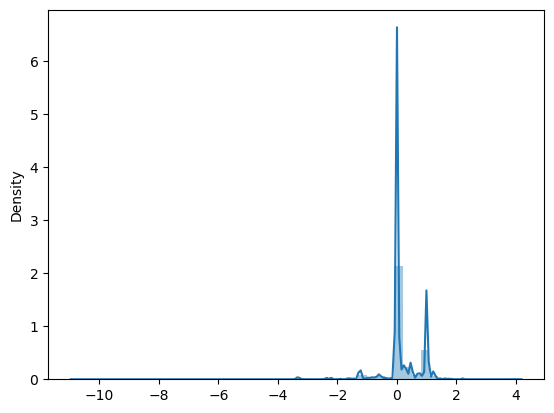

In [37]:
sns.distplot(X_transformed)

C:\Users\tahan\AppData\Local\Temp\ipykernel_23644\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Time_taken(min)', ylabel='Density'>

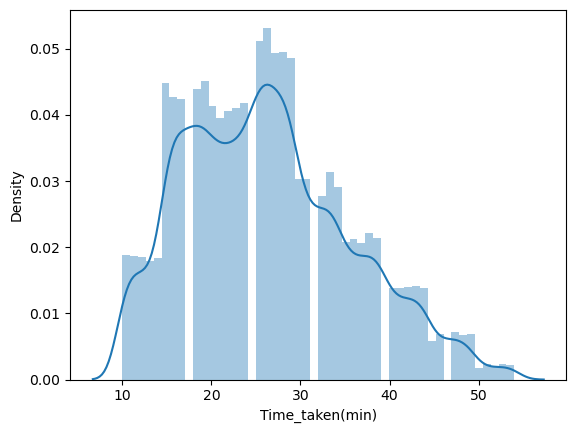

In [38]:
sns.distplot(y)

In [39]:
# Add bias term for predictions
X_b = np.c_[np.ones((X_transformed.shape[0], 1)), X_transformed]

gradient_predict = X_b @ gradient_coef
closed_form_predict = X_b @ closed_coef

In [40]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_transformed, y)

LinearRegression()

In [41]:
linear_model_predict = linear_model.predict(X_transformed)

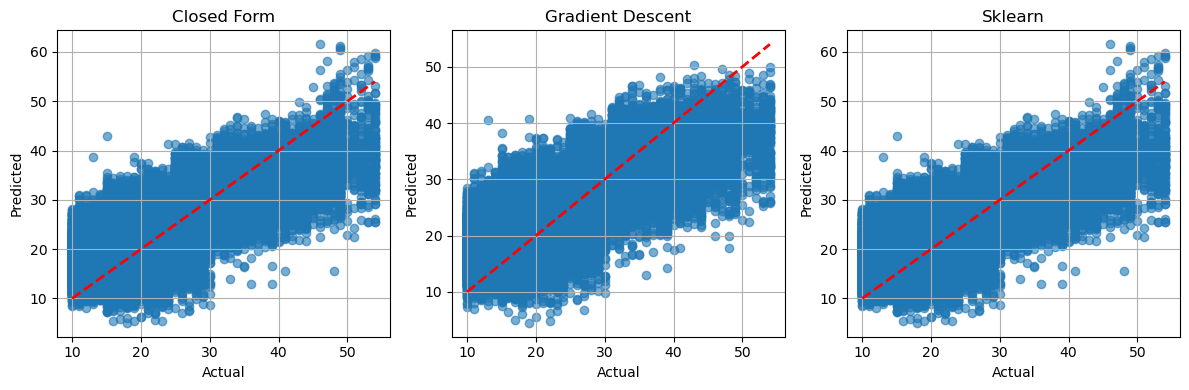

Closed Form R²: 0.5460341273902034
Gradient Descent R²: 0.5261626580562657
Sklearn R²: 0.5460341273902032

MSE Comparison:
Closed Form MSE: 39.85038676509387
Gradient Descent MSE: 41.59475960527162
Sklearn MSE: 39.85038676509388


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b @ theta

y_pred_closed = closed_form_predict
y_pred_gd = gradient_predict
y_pred_sklearn = linear_model_predict

# Plot predicted vs actual
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y, y_pred_closed, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Closed Form")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y, y_pred_gd, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Descent")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_sklearn, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sklearn")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print comparison metrics
print("Closed Form R²:", r2_score(y, y_pred_closed))
print("Gradient Descent R²:", r2_score(y, y_pred_gd))
print("Sklearn R²:", r2_score(y, y_pred_sklearn))

print("\nMSE Comparison:")
print("Closed Form MSE:", mean_squared_error(y, y_pred_closed))
print("Gradient Descent MSE:", mean_squared_error(y, y_pred_gd))
print("Sklearn MSE:", mean_squared_error(y, y_pred_sklearn))


array([[ 1.27823649,  0.79536756,  0.71354034, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.7622734 , -0.39968762, -0.55497544, ...,  0.        ,
         0.        ,  0.        ],
       [-1.12959125, -0.69845142, -0.55481765, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.07432262,  0.79536756, -0.54086683, ...,  0.        ,
         0.        ,  0.        ],
       [-1.64555433,  0.19783997, -0.8015679 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.12959125,  0.79536756,  0.79172701, ...,  0.        ,
         0.        ,  0.        ]], shape=(43685, 32))